In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [0]:
data=pd.read_csv('https://raw.githubusercontent.com/Kaggle/Google-Stock-Price-Prediction-Using-RNN---LSTM/master/GOOG.csv')

In [77]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [0]:

data_train=data[data['Date']<'2019-01-01'].copy()
data_test=data[data['Date']>'2019-01-01'].copy()

In [88]:
data_train=data_train.drop(['Date', 'Adj Close'], axis=1)

data_train.head()

AttributeError: ignored

In [0]:
scaler=MinMaxScaler()
data_train=scaler.fit_transform(data_train)

In [0]:
x_train=[]
y_train=[]

In [0]:
for i in range(60,data_train.shape[0]):
    x_train.append(data_train[i-60:i])
    y_train.append(data_train[i,0])
  

In [0]:
x_train, y_train = np.array(x_train) , np.array(y_train)

In [84]:
x_train.shape

(3557, 60, 5)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [0]:
model = Sequential()


model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.2))
          
model.add(Dense(units=1))




In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
model.fit(x_train, y_train, epochs=60, batch_size=32)

Epoch 1/60
3557/3557 [==============================] - 28s 8ms/step - loss: 0.0159
Epoch 2/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0020
Epoch 3/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0019
Epoch 4/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0022
Epoch 5/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0019
Epoch 6/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0014
Epoch 7/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0015
Epoch 8/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0013
Epoch 9/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0015
Epoch 10/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0014
Epoch 11/60
3557/3557 [==============================] - 25s 7ms/step - loss: 0.0013
Epoch 12/60
3557/3557 [==============================] - 25s 7ms/step - lo

In [109]:
new=data[data['Date']<'2019-01-01']
new.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [0]:
last_60_days = new.tail(60)



In [111]:
df = last_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [0]:
inputs=scaler.transform(df)

In [0]:
x_test=[]
y_test=[]


for i in range(60, inputs.shape[0]):
  
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [114]:
x_test,y_test= np.array(x_test), np.array(y_test)

x_test.shape

(192, 60, 5)

In [115]:
y_test.shape

(192,)

In [0]:
pred= model.predict(x_test)

In [117]:
scaler.scale_

array([3.33222286e-03, 3.49980700e-03, 3.37626754e-03, 3.21171650e-03,
       1.81307225e-07])

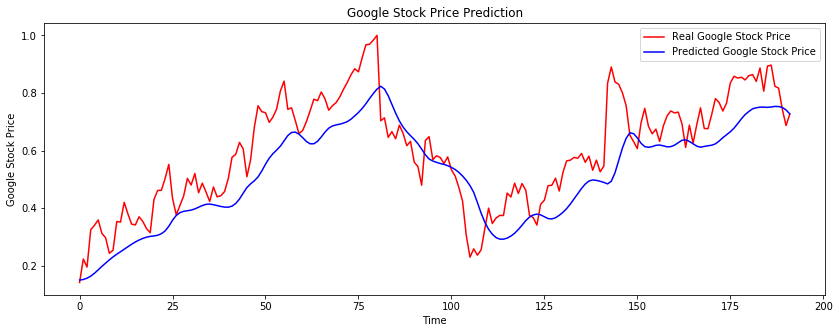

In [118]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
